[Think Stats Chapter 4 Exercise 2](http://greenteapress.com/thinkstats2/html/thinkstats2005.html#toc41) (a random distribution)

This questions asks you to examine the function that produces random numbers. Is it really random? 

# - [ ]: Finish this question

In [116]:
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
def generate_pdf_cdf_pandas(samples, decimals=4):

    # Put the samples into a series, rounding helps create a distribution
    sample_df = pd.Series(samples.round(decimals))

    # Convert to a dataframe with the number of occurrences of each value
    sample_df = ( sample_df
                 .value_counts()
                 .to_frame()
                 .reset_index()
                 .rename(columns={'index':'samples',0:'counts'})
                 .sort_values('samples')
                 .reset_index(drop=True)
                )

    # Calculate the PMF and the CDF
    sample_df['pmf'] = sample_df.counts.astype(np.float) / sample_df.counts.sum()
    sample_df['cdf'] = sample_df.pmf.cumsum()
    
    return sample_df

For good measure, here is a version of the above function using only numpy.

In [118]:
def generate_pdf_cdf(samples, decimals=4):
    
    # Create an array of all rounded values
    full_samples = distribution_42.copy().round(decimals)
    
    # Convert this to a unique, sorted array
    samples = np.sort(np.unique(full_samples))

    # Get the counts for each entry
    counts = np.array([(full_samples==x).sum() for x in samples])
    
    # Calculate the PMF and CDF
    pmf = counts.astype(np.float) / counts.sum()
    cdf = pmf.cumsum()
    
    return {'samples':samples, 'counts':counts, 'pmf':pmf, 'cdf':cdf}

In [139]:
nsamples = 5000

np.random.seed(42)
distribution_42 = np.random.normal(loc=0.0, scale=1.0, size=nsamples)

#df_42 = generate_pdf_cdf_pandas(distribution_42)

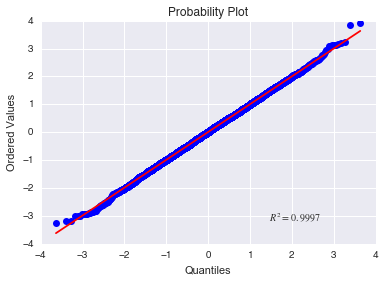

In [122]:
stats.probplot(distribution_42, dist='norm', plot=plt)
plt.show()

In [ ]:
np.random.seed(84)
distribution_84 = np.random.normal(loc=0.0, scale=1.0, size=nsamples)

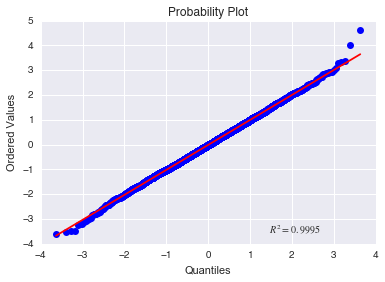

In [123]:
stats.probplot(distribution_84, dist='norm', plot=plt)
plt.show()

In [ ]:
xdata_42 = np.linspace(df_42.samples.min(), df_42.samples.max(), df_42.shape[0])
compare_42 = stats.norm.cdf(xdata_42, loc=0.0, scale=1.0)